## Digit Recognizer V2

This model is a part of the kaggle competition (https://www.kaggle.com/c/digit-recognizer)


### Data
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

For about data at https://www.kaggle.com/c/digit-recognizer/data


In [2]:
#get the data

import pandas as pd
import numpy as np


train = pd.read_csv('./digit-recognizer/train.csv', delimiter = ',')
test = pd.read_csv('./digit-recognizer/test.csv', delimiter = ',')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [5]:
train['label'][0]

1

In [6]:
label_train = train['label']
train = train.drop('label', axis=1)
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


LABEL: 3


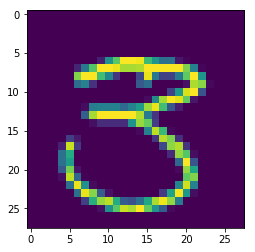

In [8]:
#Lets visualize few images for fun.
import matplotlib.pyplot as plt
train_image = np.split(train.iloc[7], 28)
plt.imshow(train_image)
print("LABEL: {}".format(label_train[7]))

In [9]:
### Add MNIST dataset

from keras.datasets import mnist

(train_1, train_1_labels), (train_2, train_2_labels) = mnist.load_data()

print(train_1.shape)
print(train_2.shape)

Using TensorFlow backend.


(60000, 28, 28)
(10000, 28, 28)


In [10]:
train = pd.DataFrame(train).to_numpy()
test = pd.DataFrame(test).to_numpy()

In [11]:
#Rehape and Normalize
train = train.reshape((42000, 28 * 28))
train = train / 255.0
test = test.reshape((28000, 28 * 28))
test = test / 255.0
train_1 = train_1.reshape((60000, 28 * 28))
train_1 = train_1 / 255.0
train_2 = train_2.reshape((10000, 28 * 28))
train_2 = train_2 / 255.0

In [12]:
train = np.concatenate((train, train_1, train_2), axis=0)

label_train = np.concatenate((label_train, train_1_labels, train_2_labels), axis=0)

print(train.shape)
print(label_train.shape)






(112000, 784)
(112000,)


In [13]:
#label 
from keras.utils import to_categorical
label_train = to_categorical(label_train)


In [14]:
from keras import layers, models
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (784,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['acc'])
history = model.fit(train, label_train, epochs = 20, batch_size = 128)

W0729 04:14:37.678547 12268 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 04:14:55.395414 12268 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 04:14:57.728000 12268 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 04:14:58.994016 12268 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0729 04:14:59.199956 12268 deprecation.py:506

Epoch 1/20
112000/112000 [==============================] - 35s 311us/step - loss: 0.2513 - acc: 0.9262
Epoch 2/20
112000/112000 [==============================] - 19s 169us/step - loss: 0.1104 - acc: 0.9668
Epoch 3/20
112000/112000 [==============================] - 19s 170us/step - loss: 0.0807 - acc: 0.9749
Epoch 4/20
112000/112000 [==============================] - 19s 170us/step - loss: 0.0662 - acc: 0.9787
Epoch 5/20
112000/112000 [==============================] - 19s 168us/step - loss: 0.0552 - acc: 0.9827
Epoch 6/20
112000/112000 [==============================] - 19s 166us/step - loss: 0.0464 - acc: 0.9849
Epoch 7/20
112000/112000 [==============================] - 19s 172us/step - loss: 0.0420 - acc: 0.98660s - loss: 0.0422
Epoch 8/20
112000/112000 [==============================] - 19s 168us/step - loss: 0.0388 - acc: 0.98692s - loss: 0.0380 - acc: 
Epoch 9/20
112000/112000 [==============================] - 19s 171us/step - loss: 0.0349 - acc: 0.98891s -
Epoch 10/20
112000

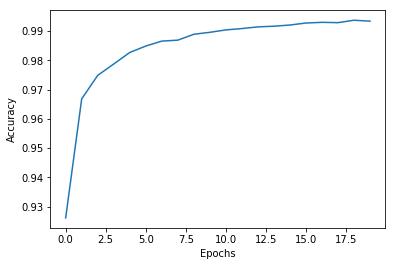

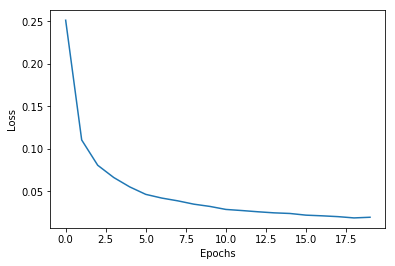

In [15]:
# Lets visualize loss and accuracy over epochs

accuracy = history.history['acc']
loss = history.history['loss']
epochs = range(20) 
plt.plot(epochs, accuracy, label = "Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
plt.plot(epochs, loss, label = "Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


## Comment

Accuracy and Loss both seems to be converging with accuracy close to 1, and loss close to 0. We have to test it on test data.

In [16]:
predictions = model.predict(test)
predictions = np.argmax(predictions,axis = 1)
predictions = pd.Series(predictions,name="Label")

predictions.head()

0    2
1    0
2    9
3    0
4    3
Name: Label, dtype: int64

2


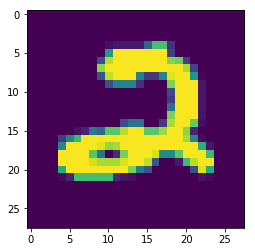

In [18]:
#lets visualize one 
print(predictions[0])
test_image = np.split(test[0],28)
plt.imshow(test_image)

In [19]:



submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"), predictions],axis = 1)

submission.to_csv("submission.csv",index=False)




## Comment

Although, increase in accuracy is not significant compared to previous case, but still it's better to use for submission.